In [24]:
import ParentImport
import numpy as np
import matplotlib.pyplot as plt

from Extractor import Extractor
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from EmbedsReader import EmbedsReader

In [25]:
filename = 'dem-comments-220424-1305.csv'
extractor = Extractor(filename=filename, load_dir='../datasets')
good_embed = extractor.word_embedding('good')
evil_embed = extractor.word_embedding('evil')
rep_embed = extractor.word_embedding('republican')
dem_embed = extractor.word_embedding('democrat')

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.decoder.weight', 'cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


['[CLS]', 'good', '[SEP]']
['[CLS]', 'evil', '[SEP]']
['[CLS]', 'republican', '[SEP]']
['[CLS]', 'democrat', '[SEP]']


In [2]:
data = np.load('../extractions/extracts-220429-1217.npy', allow_pickle=True)
print(data[()].keys())
print(data[()]['extractions'].keys())

dict_keys(['filepath', 'extractions', 'stamp', 'tag'])
dict_keys(['america', 'confederate', 'martyr', 'hero', 'traitor', 'russia', 'china', 'justice', 'injustice', 'republican', 'democrat', 'evil', 'good', 'healthcare', 'libertarian', 'authoritarian', 'liberal', 'conservative', 'drugs', 'weed', 'cannabis', 'marijuana', 'rights', 'right', 'left', 'freedom', 'liberty', 'police', 'immigrants', 'immigrant', 'illegal', 'legal', 'privilege', 'entitled', 'angry', 'lazy', 'dilligent', 'stupid', 'intelligent', 'communist', 'communism', 'fascist', 'fascism', 'socialist', 'socialism'])


In [3]:
reader = EmbedsReader()
reader.load('../extractions/extracts-220429-1217.npy')
reader.load('../extractions/extracts-220429-1219.npy')
print(reader.tags)

('dem', 'rep')


In [4]:
print(reader.get_words('dem'))

('america', 'confederate', 'martyr', 'hero', 'traitor', 'russia', 'china', 'justice', 'injustice', 'republican', 'democrat', 'evil', 'good', 'healthcare', 'libertarian', 'authoritarian', 'liberal', 'conservative', 'drugs', 'weed', 'cannabis', 'marijuana', 'rights', 'right', 'left', 'freedom', 'liberty', 'police', 'immigrants', 'immigrant', 'illegal', 'legal', 'privilege', 'entitled', 'angry', 'lazy', 'dilligent', 'stupid', 'intelligent', 'communist', 'communism', 'fascist', 'fascism', 'socialist', 'socialism')


869 995
88 100


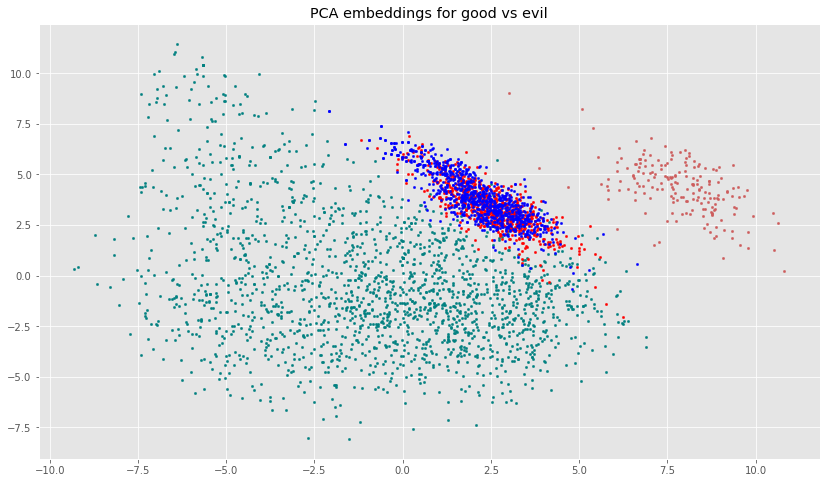

In [29]:
dem_good = reader.read_embeddings('dem', 'good')
rep_good = reader.read_embeddings('rep', 'good')
good_embeds = np.concatenate((dem_good, rep_good))

dem_evil = reader.read_embeddings('dem', 'evil')
rep_evil = reader.read_embeddings('rep', 'evil')
evil_embeds = np.concatenate((dem_evil, rep_evil))

rep_rep = reader.read_embeddings('rep', 'republican')
dem_rep = reader.read_embeddings('dem', 'republican')
rep_embeds = np.concatenate((rep_rep, dem_rep))

print(len(dem_good), len(rep_good))
print(len(dem_evil), len(rep_evil))

all_embeds = np.concatenate((
    good_embeds, evil_embeds
))

pca = PCA(n_components=2)
# pca.fit([good_embed, evil_embed])
pca.fit(all_embeds)

plt.style.use('ggplot')
plt.figure(figsize=(14,8))
plt.title('PCA embeddings for good vs evil')

def plot_embeds(embeds, color='black'):
    pca_result = pca.transform(embeds)
    x, y = pca_result[:, 0], pca_result[:, 1]
    plt.scatter(x, y, s=5, c=color)
    
plot_embeds([good_embeds], 'teal')
plot_embeds(rep_rep, 'red')
plot_embeds(dem_rep, 'blue')
plot_embeds(evil_embeds, 'indianred')

869 995
88 100


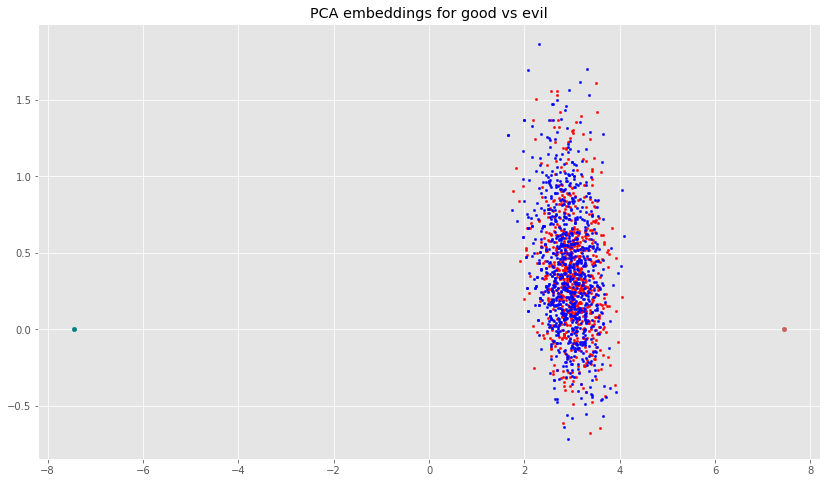

In [42]:
dem_good = reader.read_embeddings('dem', 'good')
rep_good = reader.read_embeddings('rep', 'good')
good_embeds = np.concatenate((dem_good, rep_good))

dem_evil = reader.read_embeddings('dem', 'evil')
rep_evil = reader.read_embeddings('rep', 'evil')
evil_embeds = np.concatenate((dem_evil, rep_evil))

rep_rep = reader.read_embeddings('rep', 'republican')
dem_rep = reader.read_embeddings('dem', 'republican')
rep_embeds = np.concatenate((rep_rep, dem_rep))

print(len(dem_good), len(rep_good))
print(len(dem_evil), len(rep_evil))

pca = PCA(n_components=2)
# pca.fit([good_embed, evil_embed])
pca.fit([good_embed, evil_embed])

plt.style.use('ggplot')
plt.figure(figsize=(14,8))
plt.title('PCA embeddings for good vs evil')

def plot_embeds(embeds, color='black', s=5):
    pca_result = pca.transform(embeds)
    x, y = pca_result[:, 0], pca_result[:, 1]
    plt.scatter(x, y, s=s, c=color)

plot_embeds([good_embed], 'teal', s=20)
plot_embeds(rep_rep, 'red')
plot_embeds(dem_rep, 'blue')
plot_embeds([evil_embed], 'indianred', s=20)

77 69
88 100


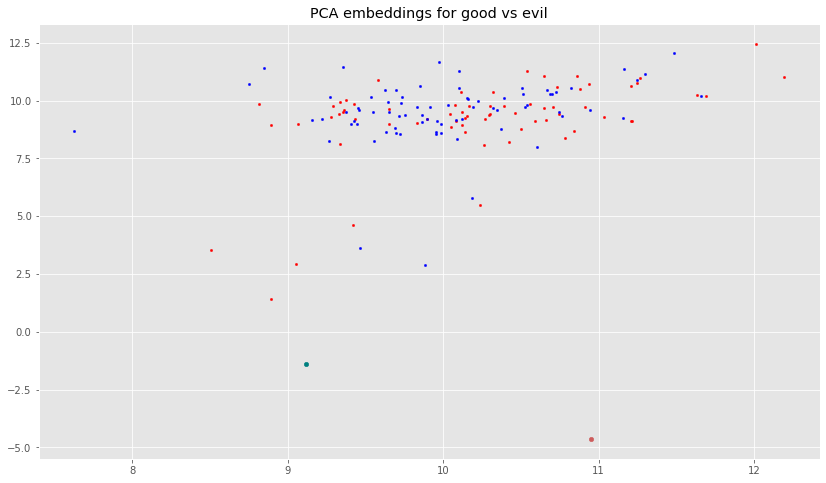

In [53]:
dem_health = reader.read_embeddings('dem', 'healthcare')
rep_health = reader.read_embeddings('rep', 'healthcare')
good_embeds = np.concatenate((dem_good, rep_good))

dem_evil = reader.read_embeddings('dem', 'evil')
rep_evil = reader.read_embeddings('rep', 'evil')
evil_embeds = np.concatenate((dem_evil, rep_evil))

rep_rep = reader.read_embeddings('rep', 'republican')
dem_rep = reader.read_embeddings('dem', 'republican')
rep_embeds = np.concatenate((rep_rep, dem_rep))

print(len(dem_good), len(rep_good))
print(len(dem_evil), len(rep_evil))

pca = PCA(n_components=2)
# pca.fit([good_embed, evil_embed])
pca.fit(np.concatenate([good_embeds, evil_embeds, rep_embeds]))

plt.style.use('ggplot')
plt.figure(figsize=(14,8))
plt.title('PCA embeddings for good vs evil')

def plot_embeds(embeds, color='black', s=5):
    pca_result = pca.transform(embeds)
    x, y = pca_result[:, 0], pca_result[:, 1]
    plt.scatter(x, y, s=s, c=color)

plot_embeds([good_embed], 'teal', s=20)
plot_embeds(rep_health, 'red')
plot_embeds(dem_health, 'blue')
plot_embeds([evil_embed], 'indianred', s=20)

In [51]:
dem_gov = reader.read_embeddings('dem', 'government')
rep_gov = reader.read_embeddings('rep', 'government')
all_gov = np.concatenate((dem_gov, rep_gov))

tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne.fit([good_embed, evil_embed])

tsne_results = tsne.transform(dem_gov)
x, y = tsne_results[:, 0], tsne_results[:, 1]

plt.style.use('ggplot')
plt.figure(figsize=(14,8))
plt.title('PCA embeddings for good vs evil')
plt.scatter(x, y, s=5, c='blue')

KeyError: 'government'